<a href="https://colab.research.google.com/github/lorduwahz/python-data-cleaning/blob/master/GB_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
download_url = ("https://raw.githubusercontent.com/fivethirtyeight/"
               "data/master/college-majors/recent-grads.csv"
   )

df = pd.read_csv(download_url)

In [4]:
df.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [5]:
df['Major'].is_unique

True

In [6]:
df.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [7]:
%matplotlib inline

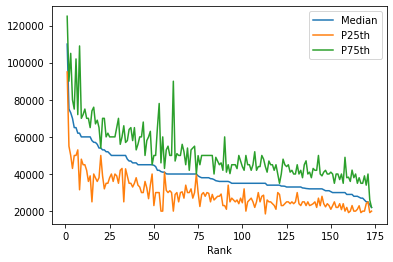

In [9]:
df.plot(x='Rank', y=['Median', 'P25th', 'P75th'])
#<AxesSubplot:xlabel='Rank'>

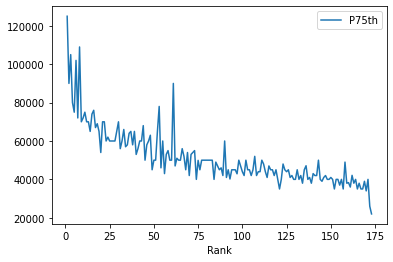

In [10]:
df.plot(x='Rank', y='P75th')

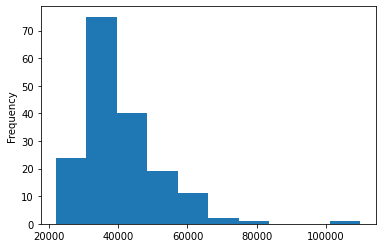

In [11]:
median_plt = df['Median']
median_plt.plot(kind='hist')

In [12]:
type(median_plt)

pandas.core.series.Series

In [13]:
median_lst = median_plt.to_list()
median_lst.sort()
len(median_lst)

173

In [14]:
top_5 = df.sort_values(by='Median', ascending=False).head(7)

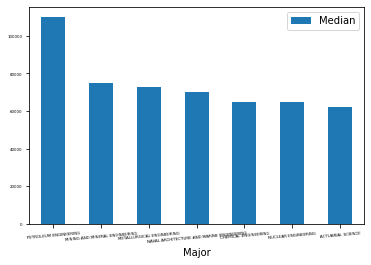

In [15]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)

In [16]:
top_majors = df[df['Median'] > 60000].sort_values('Median')

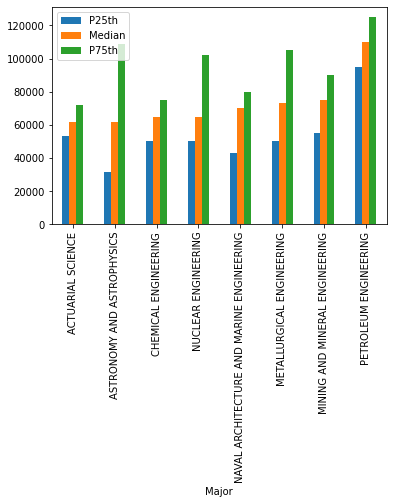

In [18]:
top_majors.plot(x='Major', y=['P25th', 'Median', 'P75th'], kind='bar')

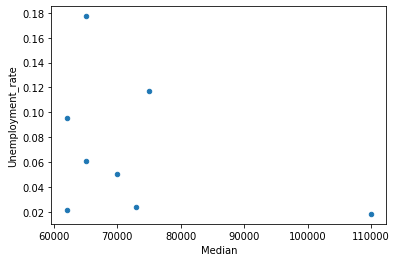

In [19]:
top_majors.plot(x='Median', y='Unemployment_rate', kind='scatter')

In [23]:
cat_totals = df.groupby("Major_category")["Median"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        35000
Communications & Journalism             138000
Law & Public Policy                     211000
Industrial Arts & Consumer Services     254400
Arts                                    264500
Psychology & Social Work                270900
Social Science                          336100
Agriculture & Natural Resources         369000
Physical Sciences                       418900
Health                                  441900
Computers & Mathematics                 470200
Humanities & Liberal Arts               478700
Biology & Life Science                  509900
Education                               517600
Business                                566000
Engineering                            1664100
Name: Median, dtype: int64

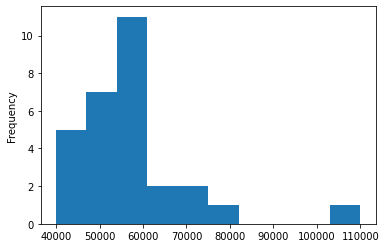

In [24]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")